In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df=pd.read_csv("housing.csv")

### EDA

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.3 KB


In [ ]:
# our data has no null values

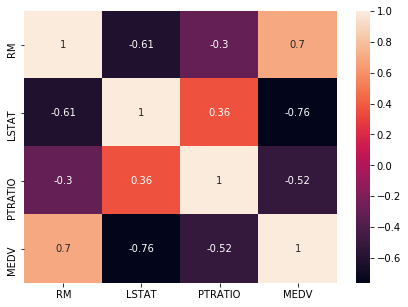

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

<Figure size 2160x576 with 0 Axes>

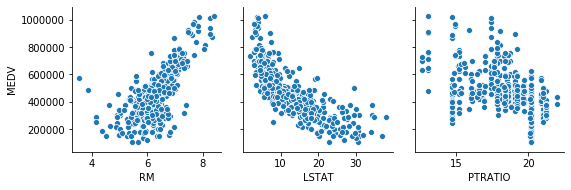

In [19]:
plt.figure(figsize=(30,8))
sns.pairplot(x_vars=['RM', 'LSTAT', 'PTRATIO'],y_vars=['MEDV'],data=df)

Here we can see that MEDV and RM have roughly positive correlation and MEDV has negative correlation with LSTAT where as PTRATIO has no or very less correlation

### Splitting the dataset

In [21]:
x=df.drop(columns="MEDV")
y=df["MEDV"]

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
xtrain.head()

,RM,LSTAT,PTRATIO
307,6.382,10.36,18.4
58,6.145,6.86,19.7
424,6.406,19.52,20.2
78,6.232,12.34,18.7
439,5.976,19.01,20.2


### Training the model

In [24]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Testing the model

In [25]:
ypred=model.predict(xtest)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Model evaluation


In [27]:
mse=mean_squared_error(ytest,ypred) 
mse

8049718537.443865

In [28]:
rmse=np.sqrt(mse)
rmse

89720.22368141904

In [29]:
mae=mean_absolute_error(ytest,ypred)
mae

71069.23755487362

In [30]:
score=r2_score(ytest,ypred)
score

0.7042069943455351

In [31]:
#slope
model.coef_

array([ 78887.35875343, -10981.11109003, -20395.34978704])

In [32]:
#y intercept
model.intercept_

487705.1511926533

### Scaling the Data

In [34]:
# for scaling the data we are using standard scalar
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain = sc.transform(xtrain)
sc_xtest = sc.transform(xtest)


### Evaluating the new model

In [35]:
model = LinearRegression()
model.fit(sc_xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
sc_ypred = model.predict(sc_xtest)

In [38]:
mse=mean_squared_error(ytest,sc_ypred) 
mse

8049718537.443869

In [39]:
rmse=np.sqrt(mse)
rmse

89720.22368141905

In [40]:
mae=mean_absolute_error(ytest,sc_ypred)
mae

71069.23755487366

In [41]:
score=r2_score(ytest,sc_ypred)
score

0.704206994345535

Here the output of evaluation from both the models i.e. after the scaling and before the scaling is same. So there is no significant effect due to scaling on this data.